In [1]:
# import packages
import pandas as pd # For reading and manipulating 2D data (like spreadsheets)
import numpy as np # For doing numerical calculations (literally NUMerical PYthon)
import matplotlib.pyplot as plt # For making graphs

from sklearn import datasets, linear_model

# Setting to show graphs below cells in colab
%matplotlib inline

In [2]:
co2 = pd.read_csv(r"../data/CO2.csv")
gdp = pd.read_csv(r"../data/GDP.csv")

joint = pd.merge(co2, gdp, on='Year', how='inner')
joint = joint.dropna()

joint

,Year,CO2,GDP
0,1990,2.275270e+10,9718.0080
1,1991,2.322948e+10,9682.0530
2,1992,2.256720e+10,9679.0460
3,1993,2.279835e+10,9687.9820
4,1994,2.303478e+10,9811.6240
5,1995,2.352449e+10,9968.6730
6,1996,2.425016e+10,10192.9450
7,1997,2.439595e+10,10440.5300
8,1998,2.433094e+10,10553.4510
9,1999,2.483350e+10,10776.4795


In [3]:
co2_array = joint["CO2"].to_numpy().reshape(-1, 1)
gdp_array = joint["GDP"].to_numpy().reshape(-1, 1)

regr = linear_model.LinearRegression(fit_intercept=True)
model_1 = regr.fit(co2_array, gdp_array)
print(f"The model [ y = {regr.coef_[0][0]} x + {regr.intercept_[0]}] has score " + 
      f"{regr.score(co2_array, gdp_array)}.")


The model [ y = 4.7511841798594795e-07 x + -1238.4651723237766] has score 0.9683779972103843.


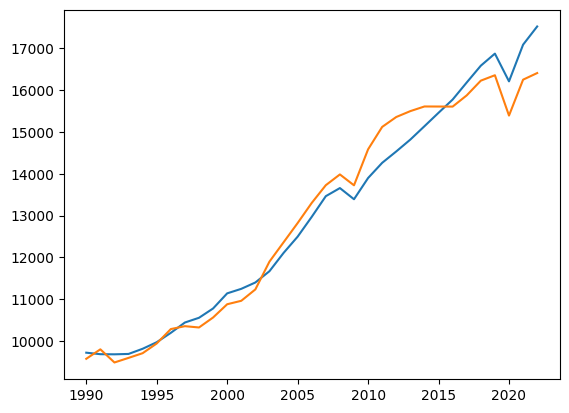

In [4]:
def co2_to_gdp(array):
    predict_array = model_1.predict(array)

    return predict_array

# inspect the fit in historical data
gdp_predict = co2_to_gdp(joint["CO2"].to_numpy().reshape(-1, 1))
plt.plot(np.asarray(joint["Year"], float), joint["GDP"])
plt.plot(np.asarray(joint["Year"], float), gdp_predict)
plt.show()